In [22]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import models

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.8.0


In [4]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(8,activation='softmax')(x) #FC-layer

29097984/29084464 [==============================] - 1s 0us/step


In [5]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(3,activation='softmax')(x) #FC-layer

In [6]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                              

In [7]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                              

In [9]:
data=[]
labels=[]
random.seed(42)
# imagePaths = sorted(list(os.listdir("/content/drive/MyDrive/Mini_DDSM_Upload")))
imagePaths = ['Benign','Cancer','Normal']
random.shuffle(imagePaths)
print(imagePaths)




['Cancer', 'Benign', 'Normal']


In [10]:
for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/"+img)))
    for i in path:
      if("RIGHT_CC" in i):
        #Considereing original and flipped image
        for flip in range(2):
          if(flip == 0):
            print("\n****************************************")
            print("Original")
            image_path = "/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/"+img+"/"+i
            # print("\n")
            print(image_path)
            # print("Reading image")
            image = cv2.imread(image_path)
            
            image = cv2.resize(image, (128,128))
            # print(image)
            # print("\nResized Over")
            
            # print("\nGoing in tensorflow preprocessing")
            image = tensorflow.keras.preprocessing.image.img_to_array(image)
            # print("Appending image data")
            data.append(image)
            l = label = img
            # print("Label - ",l)
            labels.append(l)
          else:
            print("\n\n")
            print("FLIPPED")
            image_path = "/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/"+img+"/"+i
            # print("\n")
            # print("Image Path - ",image_path)
            # print("Reading image ",i)
            image = cv2.imread(image_path)
            # print("Flipping Image")
            image = cv2.flip(image,1)
            
            # print("\nResizing the flipped image")
            image = cv2.resize(image, (128,128))
            # print(image)
            # print("\nResizing Over")
            
            # print("\nGoing in tensorflow preprocessing")
            image = tensorflow.keras.preprocessing.image.img_to_array(image)
            # print("Appending image data")
            data.append(image)
            l = label = img
            print("Label - ",l)
            labels.append(l)
        else:
          continue


Streaming output truncated to the last 5000 lines.



FLIPPED
Label -  Normal

****************************************
Original
/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/Normal/1828_D_4536_1.RIGHT_CC.LJPEG.1_highpass.png



FLIPPED
Label -  Normal

****************************************
Original
/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/Normal/1832_D_4537_1.RIGHT_CC.LJPEG.1_highpass.png



FLIPPED
Label -  Normal

****************************************
Original
/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/Normal/1836_D_4538_1.RIGHT_CC.LJPEG.1_highpass.png



FLIPPED
Label -  Normal

****************************************
Original
/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/Normal/1840_D_4539_1.RIGHT_CC.LJPEG.1_highpass.png



FLIPPED
Label -  Normal

****************************************
Original
/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/Normal/1844_D_4540_1.RIGHT_CC.LJPEG.1_highpass.png



FLIPPED
Label -  Normal

****************

In [11]:
print("Length of dataset = ",len(labels))

Length of dataset =  3358


In [12]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)
print(labels[0])

[0 1 0]


In [13]:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.2,random_state=42)
print(xtrain.shape, xtest.shape)

(2686, 128, 128, 3) (672, 128, 128, 3)


In [14]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=150, #try 100
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

Epoch 1/150

Epoch 1: val_loss improved from inf to 1.14423, saving model to model.h5
20/20 - 32s - loss: 1.1536 - accuracy: 0.6388 - val_loss: 1.1442 - val_accuracy: 0.6083 - lr: 0.0010 - 32s/epoch - 2s/step
Epoch 2/150

Epoch 2: val_loss improved from 1.14423 to 0.74184, saving model to model.h5
20/20 - 12s - loss: 0.8892 - accuracy: 0.7035 - val_loss: 0.7418 - val_accuracy: 0.6906 - lr: 0.0010 - 12s/epoch - 613ms/step
Epoch 3/150

Epoch 3: val_loss improved from 0.74184 to 0.55075, saving model to model.h5
20/20 - 12s - loss: 0.7797 - accuracy: 0.7150 - val_loss: 0.5508 - val_accuracy: 0.7580 - lr: 0.0010 - 12s/epoch - 615ms/step
Epoch 4/150

Epoch 4: val_loss improved from 0.55075 to 0.55027, saving model to model.h5
20/20 - 12s - loss: 0.6840 - accuracy: 0.7314 - val_loss: 0.5503 - val_accuracy: 0.7509 - lr: 0.0010 - 12s/epoch - 614ms/step
Epoch 5/150

Epoch 5: val_loss improved from 0.55027 to 0.52286, saving model to model.h5
20/20 - 12s - loss: 0.6699 - accuracy: 0.7377 - val_l

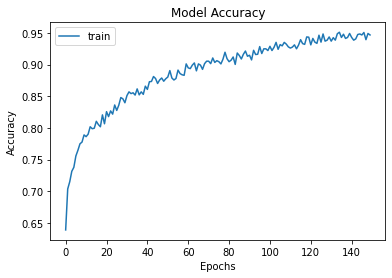

In [15]:
#Model Accuracy graph and Loss Value Graph
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'],loc = 'upper left')
plt.show()

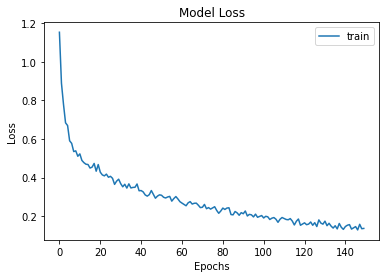

In [16]:
#Model Accuracy graph and Loss Value Graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train'],loc = 'upper right')
plt.show()

In [17]:
model.save('/content/drive/MyDrive/KFMZ/Mohsin/Mini_DDSM_Upload/ML_Models/DenseNet_150_epoch/DenseNet121/Case_5_Right_CC/model.h5')

In [18]:
ypred = model.predict(xtest)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 672 	accurately-predicted-data: 629 	 wrongly-predicted-data:  43
Accuracy: 93.601 %


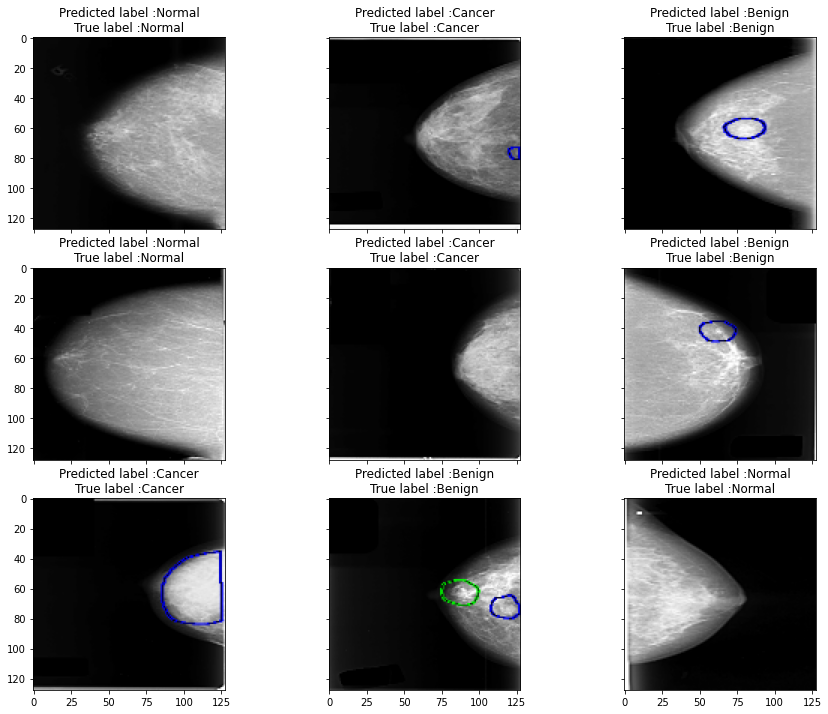

In [19]:
label=['Benign','Cancer','Normal']
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()

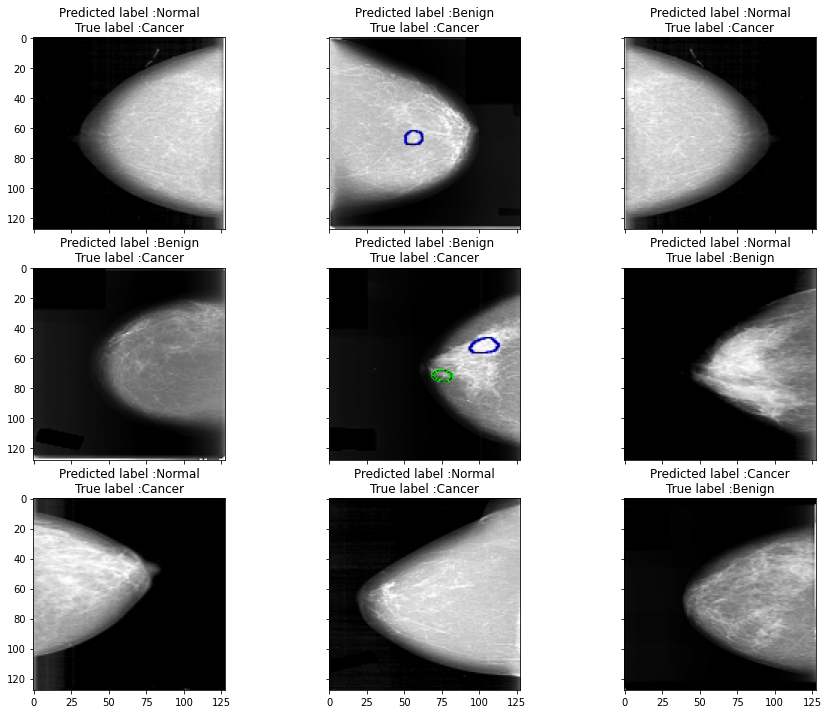

In [20]:
label=['Benign','Cancer','Normal']
imidx = random.sample(wrongindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()

Text(0.5, 145.31999999999996, 'Predicted')

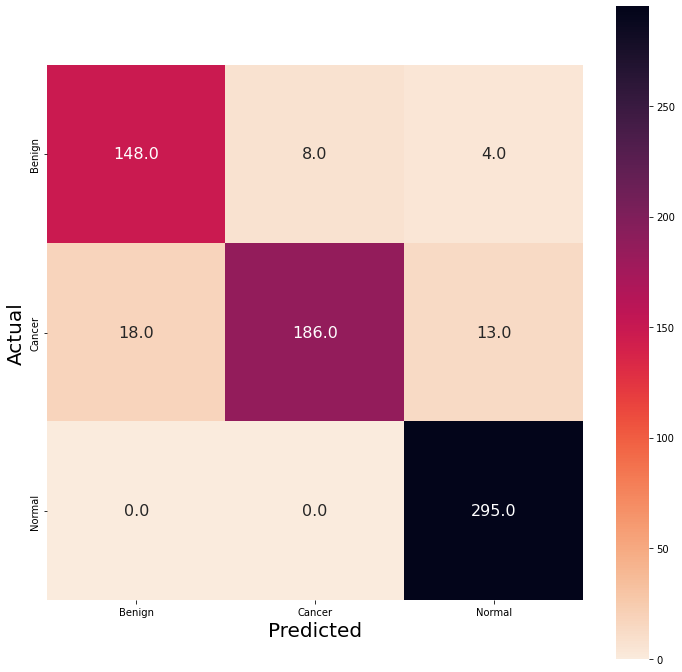

In [21]:
Ypred = model.predict(xtest)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(ytest, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)